## Import Libraries

In [1662]:
print()

In [1663]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

In [1664]:
df = pd.read_csv("allregoion.csv")

In [1665]:
df.shape

(3230, 15)

In [1666]:
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Title,Rating,Price,region,Airport Shuttle,Business Centre,Facilities for Disabled,Fitness Centre,Restaurant,Room Service,Spa,Swimming Pool,Wellness Centre
0,0,0,"Radisson Blu Hotel, Jeddah Al Salam",8.7,540,Jeddah,0,0,0,0,0,0,0,1,0
1,1,1,Holiday Inn JEDDAH GATEWAY,8.4,614,Jeddah,0,0,0,0,0,0,0,1,0


In [1667]:
df.drop(columns=['Unnamed: 0.1' , 'Unnamed: 0'] , inplace=True)

In [1668]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Title,Rating,Price,region,Airport Shuttle,Business Centre,Facilities for Disabled,Fitness Centre,Restaurant,Room Service,Spa,Swimming Pool,Wellness Centre


In [1669]:
df.isnull().sum()

Title                      0
Rating                     0
Price                      0
region                     0
Airport Shuttle            0
Business Centre            0
Facilities for Disabled    0
Fitness Centre             0
Restaurant                 0
Room Service               0
Spa                        0
Swimming Pool              0
Wellness Centre            0
dtype: int64

In [1670]:
df.dtypes

Title                       object
Rating                     float64
Price                       object
region                      object
Airport Shuttle              int64
Business Centre              int64
Facilities for Disabled      int64
Fitness Centre               int64
Restaurant                   int64
Room Service                 int64
Spa                          int64
Swimming Pool                int64
Wellness Centre              int64
dtype: object

In [1671]:
df['Price'] = df['Price'].str.replace(",", '.')

In [1672]:
df = df.astype({"Price": float})

In [1673]:
df.shape

(1424, 13)

In [1674]:
# numeric_col = [col for col in df.columns if df[col].dtype != 'object']
# cate_col = [col for col in df.columns if df[col].dtype == 'object']        

In [1675]:
# df = pd.get_dummies(df, columns=cate_col)

In [1676]:
df.shape

(1424, 13)

In [1677]:
df.head(2)

,Title,Rating,Price,region,Airport Shuttle,Business Centre,Facilities for Disabled,Fitness Centre,Restaurant,Room Service,Spa,Swimming Pool,Wellness Centre
0,"Radisson Blu Hotel, Jeddah Al Salam",8.7,540.0,Jeddah,0,0,0,0,0,0,0,1,0
1,Holiday Inn JEDDAH GATEWAY,8.4,614.0,Jeddah,0,0,0,0,0,0,0,1,0


In [1678]:
# p35 = df['Rating'].quantile(0.35)
# p75 = df['Rating'].quantile(0.75)

# def categorize_price(price):
#     if price < p35:
#         return 'Low_Rate'
#     elif price < p75:
#         return 'Good_Rate'
#     else:
#         return 'Hight_Rate'

# df['Rating'] = df['Rating'].apply(categorize_price)

# print(df['Rating'].value_counts())

In [1679]:
# p35 = df['Price'].quantile(0.35)
# p75 = df['Price'].quantile(0.75)

# def categorize_price(price):
#     if price < p35:
#         return 'Low_Price'
#     elif price < p75:
#         return 'Good_Price'
#     else:
#         return 'Hight_Price'

# df['Price'] = df['Price'].apply(categorize_price)

# print(df['Price'].value_counts())

In [1680]:
# p35, p75

In [1681]:
# correlation = df.corr(numeric_only=True)
# print(correlation['rate'].sort_values(ascending=False))

In [1682]:
# threshold = 0.3  

# selected_features = correlation[abs(correlation['rate']) > \
# threshold]['rate'].index
# selected_features

In [1683]:
# df.rename(columns={
#     'Swimming Pool' : 'Swimming_Pool',
#     'Room Service' : 'Room_Service',
#     'Fitness Centre' : 'Fitness_Centre',
#     'Airport Shuttle' : 'Airport_Shuttle',
#     'Highspeed Internet' : 'Highspeed_Internet'
# })

In [1684]:
# encoder = LabelEncoder()
# df['Rating'] = encoder.fit_transform(df['Rating'])  
# # df['Price'] = encoder.fit_transform(df['Price'])  

In [1685]:
numeric_col = [col for col in df.columns if df[col].dtype != 'object']
cate_col = [col for col in df.columns if df[col].dtype == 'object']        

In [1686]:
df = df[numeric_col]

In [1687]:
X = df


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [1688]:
X.shape

(1424, 11)

## Buliding the Model

In [1689]:
wcss = []
for i in range(1, 20):  
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) 


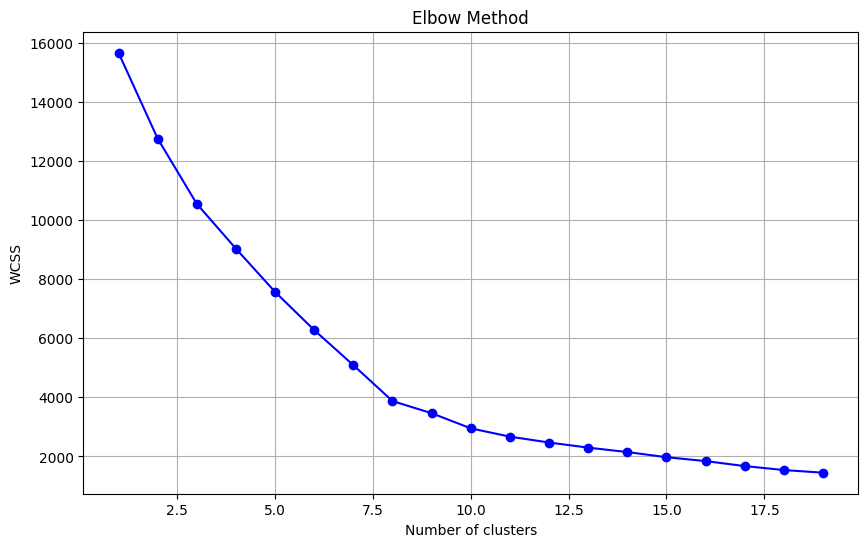

In [1690]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [1691]:
optimal_clusters = 7
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train and Test the Model

In [1692]:
y_pred = model.fit_predict(X_scaled)

## Evaluating the Model 

In [1693]:
X.shape

(1424, 11)

0 , 5 != Airport 

In [1694]:
# X[(X['kmeans'] ==0)].head(50)

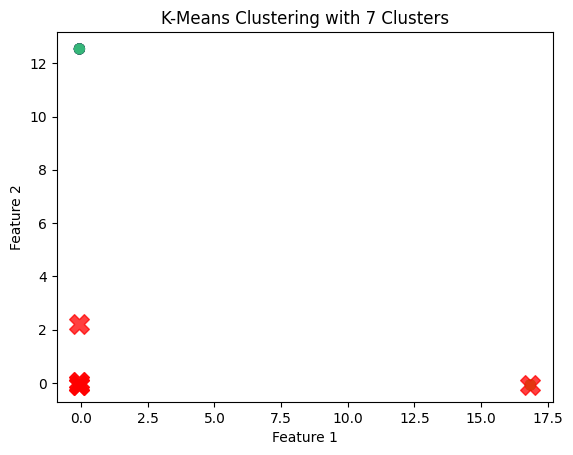

In [1695]:
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [1696]:
X['kmeans'] = y_pred

In [1697]:
X['kmeans'].value_counts()

kmeans
1    662
0    410
3    239
2     49
6     37
4     22
5      5
Name: count, dtype: int64

In [1698]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_pred)
silhouette_avg

-0.34777678178115756

In [1699]:
X

,Rating,Price,Airport Shuttle,Business Centre,Facilities for Disabled,Fitness Centre,Restaurant,Room Service,Spa,Swimming Pool,Wellness Centre,kmeans
0,8.7,540.0,0,0,0,0,0,0,0,1,0,1
1,8.4,614.0,0,0,0,0,0,0,0,1,0,1
2,8.2,193.0,0,0,0,0,0,0,1,0,1,6
3,7.4,375.0,0,0,0,0,1,0,0,1,0,0
4,8.1,472.0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3222,8.7,330.0,0,0,0,0,1,0,0,0,0,0
3223,7.8,349.0,0,0,0,0,0,0,0,0,0,1
3224,9.1,398.0,0,0,0,0,0,0,0,0,0,1
3225,7.3,178.0,0,0,0,0,0,1,0,0,0,3


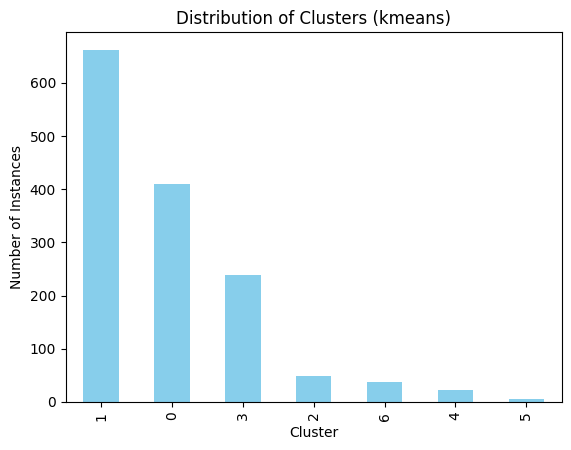

In [1700]:
X['kmeans'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Clusters (kmeans)')
plt.xlabel('Cluster')
plt.ylabel('Number of Instances')
plt.show()

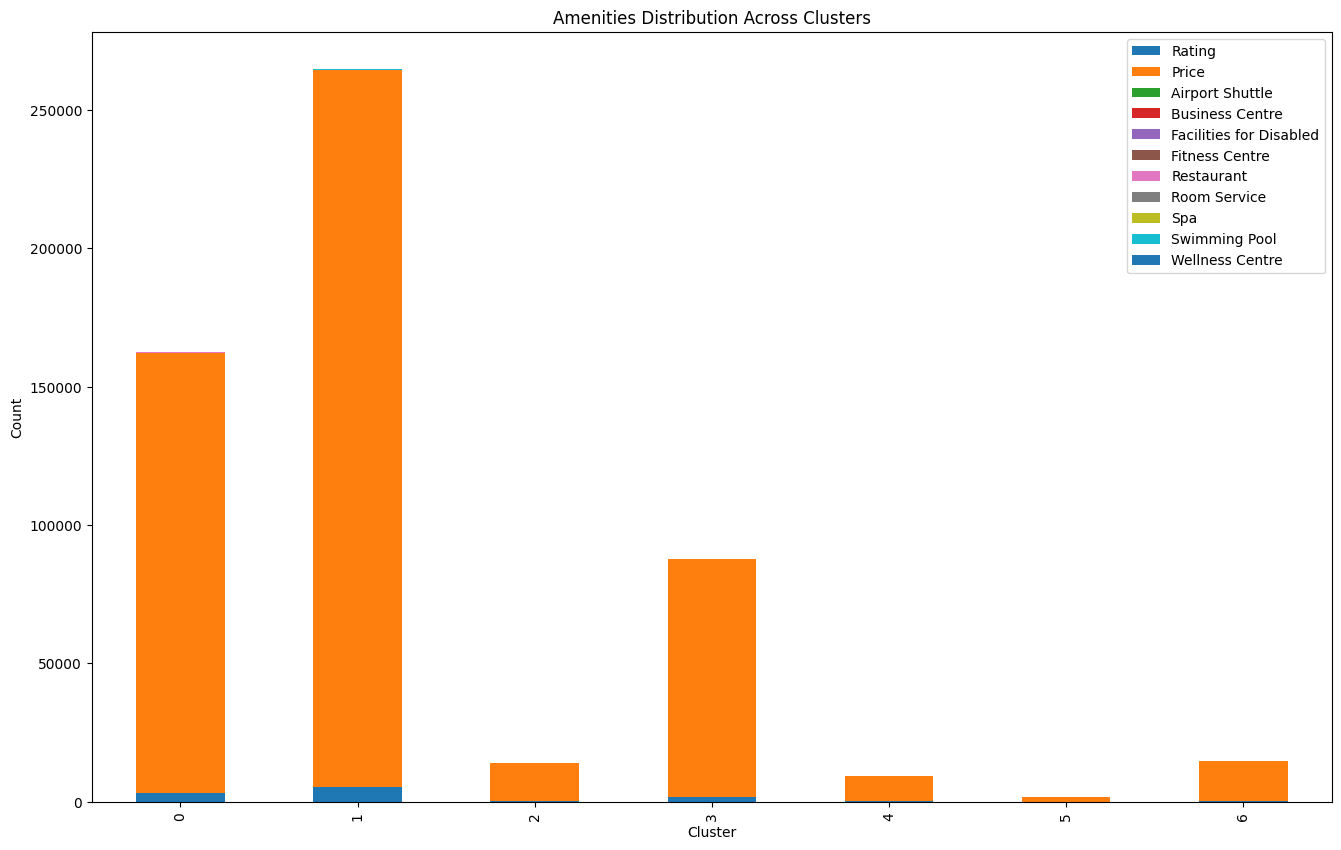

In [1701]:
X.groupby('kmeans').sum().plot(figsize=(16,10),
    kind='bar', stacked=True)
plt.title('Amenities Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [1702]:
service_counts = df[numeric_col]
# service_counts.drop(columns=['Price' , 'Rating'] , inplace=True)
service_counts = service_counts.sum()

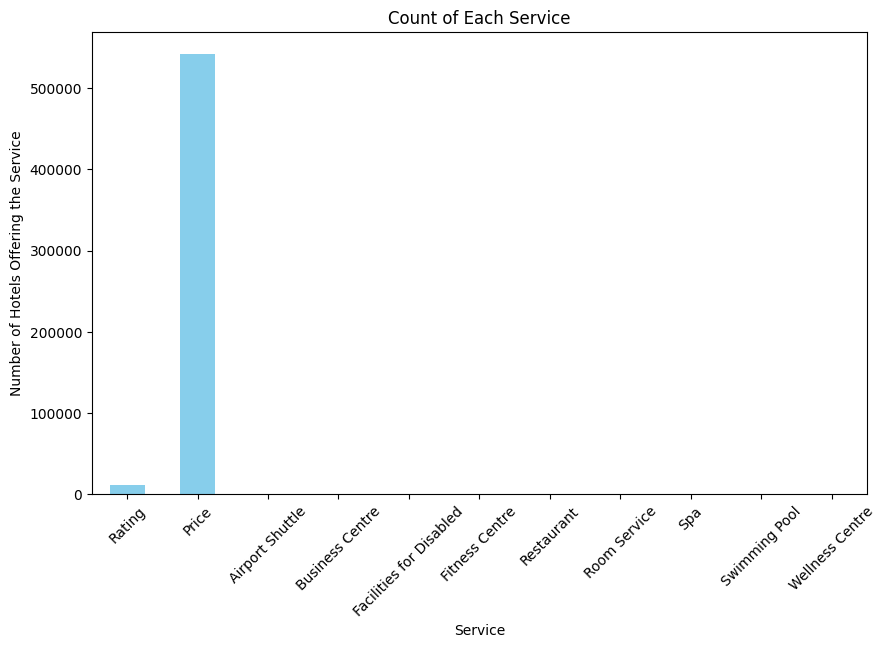

In [1703]:
# Count of each service
service_counts
# Plotting the counts
plt.figure(figsize=(10, 6))
service_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Service')
plt.xlabel('Service')
plt.ylabel('Number of Hotels Offering the Service')
plt.xticks(rotation=45)
plt.show()


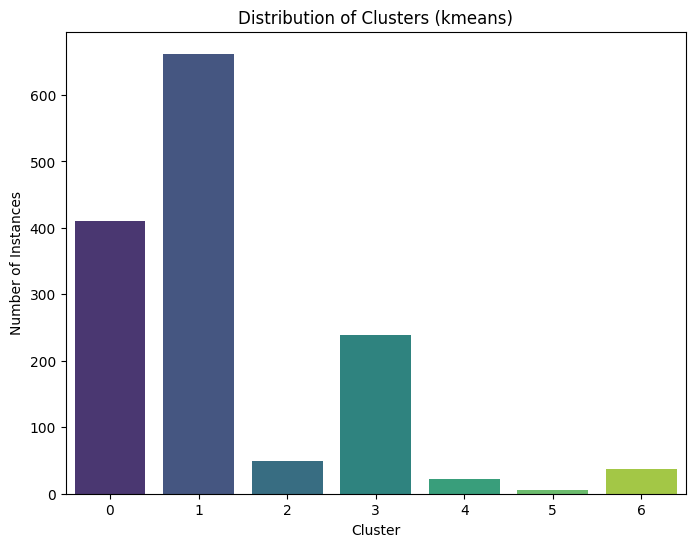

In [1704]:
# Bar plot for the distribution of clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='kmeans', data=df, palette='viridis')
plt.title('Distribution of Clusters (kmeans)')
plt.xlabel('Cluster')
plt.ylabel('Number of Instances')
plt.show()


In [1705]:
X

,Rating,Price,Airport Shuttle,Business Centre,Facilities for Disabled,Fitness Centre,Restaurant,Room Service,Spa,Swimming Pool,Wellness Centre,kmeans
0,8.7,540.0,0,0,0,0,0,0,0,1,0,1
1,8.4,614.0,0,0,0,0,0,0,0,1,0,1
2,8.2,193.0,0,0,0,0,0,0,1,0,1,6
3,7.4,375.0,0,0,0,0,1,0,0,1,0,0
4,8.1,472.0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3222,8.7,330.0,0,0,0,0,1,0,0,0,0,0
3223,7.8,349.0,0,0,0,0,0,0,0,0,0,1
3224,9.1,398.0,0,0,0,0,0,0,0,0,0,1
3225,7.3,178.0,0,0,0,0,0,1,0,0,0,3


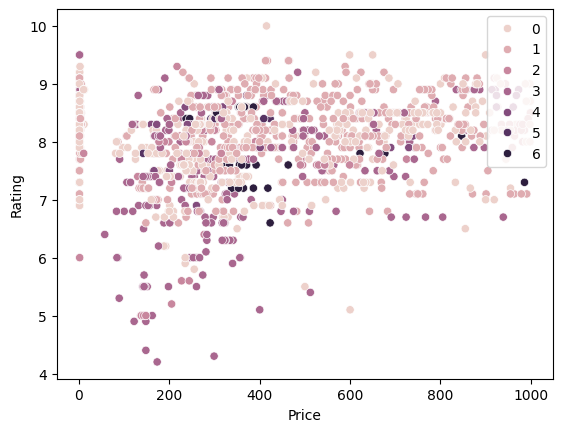

In [1706]:
# Example scatterplot
sns.scatterplot(data=X, x='Price', y='Rating', hue='kmeans')

# Adjust the legend position
plt.legend(loc='upper right')  # You can choose different locations like 'lower right', 'center', etc.

plt.show()

In [1707]:
amenities_columns = ['Airport Shuttle', 'Business Centre', 'Facilities for Disabled', 'Fitness Centre',
                     'Restaurant', 'Room Service', 'Spa', 'Swimming Pool', 'Wellness Centre']


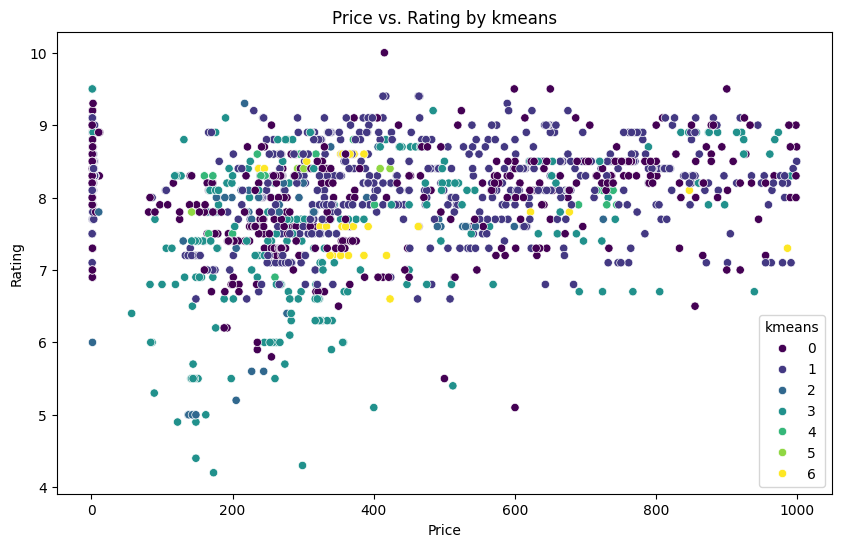

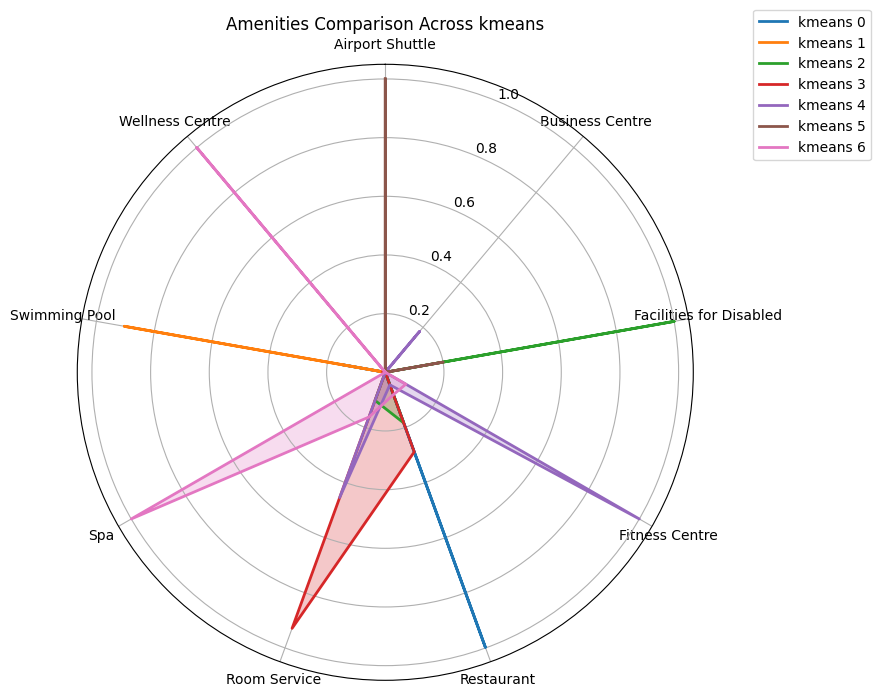

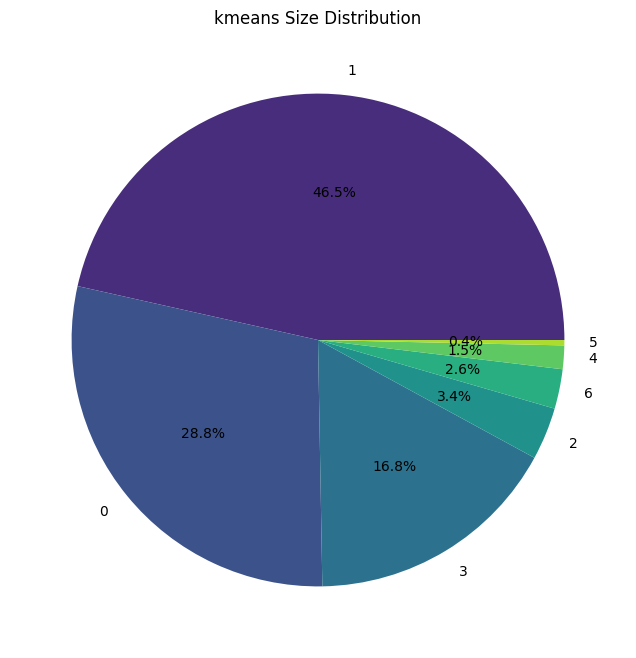

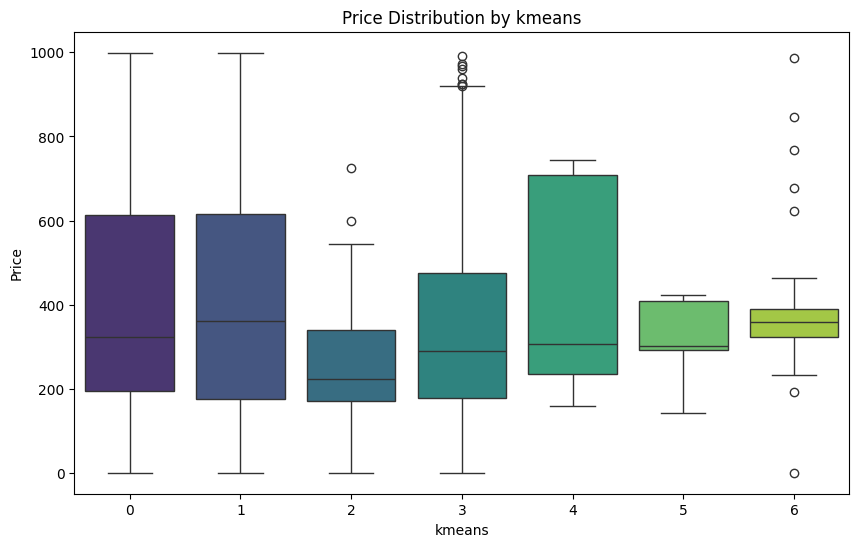

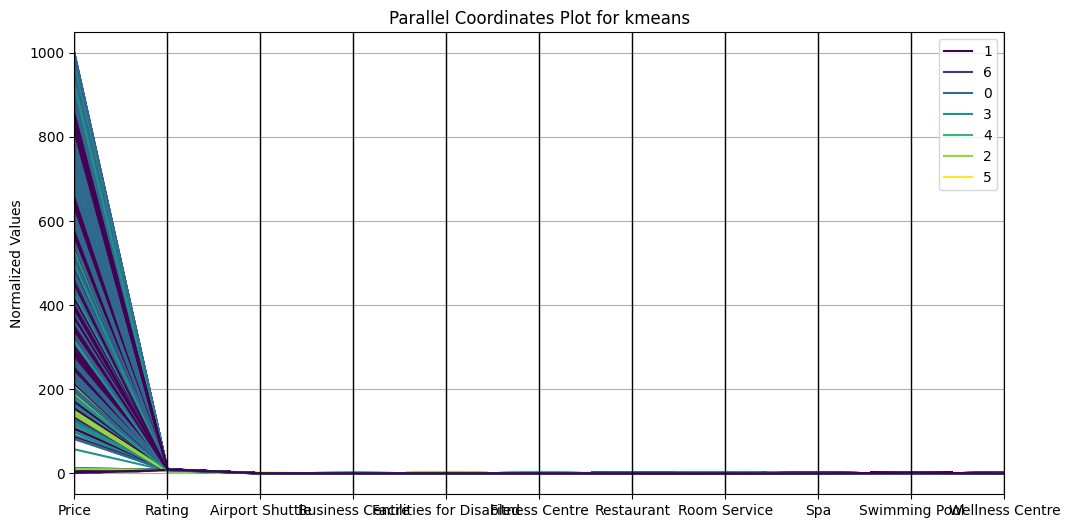

In [1708]:
from pandas.plotting import parallel_coordinates

# Scatter Plot of Price vs. Rating by kmeans
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', hue='kmeans', data=df, palette='viridis')
plt.title('Price vs. Rating by kmeans')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.legend(title='kmeans')
plt.show()

# Radar (Spider) Chart for Amenities
import numpy as np

# Calculate mean values for each amenity by kmeans
amenities_mean = df.groupby('kmeans')[amenities_columns].mean()

# Define the radar chart
num_vars = len(amenities_columns)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for kmeans in amenities_mean.index:
    values = amenities_mean.loc[kmeans].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=f'kmeans {kmeans}')
    ax.fill(angles, values, alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(amenities_columns)

plt.title('Amenities Comparison Across kmeans')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

# kmeans Size Pie Chart
plt.figure(figsize=(8, 8))
df['kmeans'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis', len(df['kmeans'].unique())))
plt.title('kmeans Size Distribution')
plt.ylabel('')
plt.show()

# Box Plot of Price Distribution by kmeans
plt.figure(figsize=(10, 6))
sns.boxplot(x='kmeans', y='Price', data=df, palette='viridis')
plt.title('Price Distribution by kmeans')
plt.xlabel('kmeans')
plt.ylabel('Price')
plt.show()

# Parallel Coordinates Plot
plt.figure(figsize=(12, 6))
parallel_coordinates(df[['kmeans', 'Price', 'Rating'] + amenities_columns], class_column='kmeans', colormap='viridis')
plt.title('Parallel Coordinates Plot for kmeans')
plt.ylabel('Normalized Values')
plt.show()

In [1709]:
# import joblib 
# joblib.dump(model, 'kmean.joblib')
# joblib.dump(scaler, 'scaler.joblib')

In [1710]:
# sns.scatterplot(data = X , x = 'Parking', y = 'Swimming_Pool', hue = 'kmeans')

In [1711]:
# sns.scatterplot(data = X , x = 'Mileage', y = 'Type_Accent', hue = 'kmeans')

In [1712]:
# from sklearn.metrics import silhouette_score
# silhouette_avg = silhouette_score(X, model)
# silhouette_avg